# Shopping Customer Segmentation (Unsupervised Machine Learning)

### Problem Statement
* Understand the target customers for the marketing team to plan a strategy

### Context
* Identify the most important shopping groups based on income, age, and the mall shopping score
* Show ideal number of groups with labels for each 

### Objective Market Segmentation
* Divide the mall target market into approachable groups. Create subsets of a market based on demographics behavioral creteria to better understand the target for market activities. 

### Approach:
* Perform Exploratory Data Analysis (EDA)
* Use K-Means Clustering Algorithm to create segments
* Use summary statistics on the clusters
* Visualize

In [1]:
# import requisite libraries

import os # allows us to interact with the operating system
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

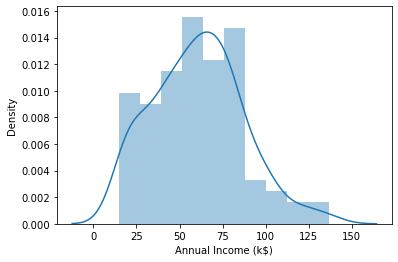

In [5]:
#df['Annual Income (k$)'].plot(kind = 'hist', figsize=(14,6))

sns.distplot(df['Annual Income (k$)']) #using seaborn

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

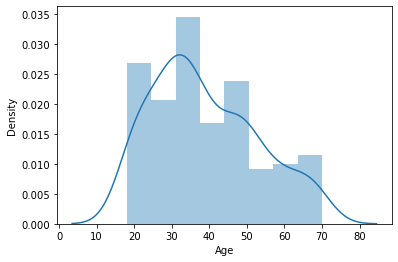

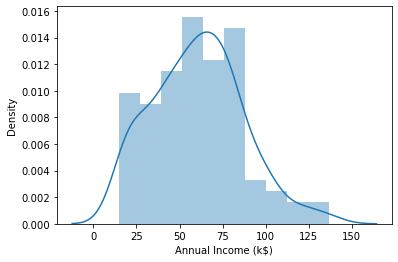

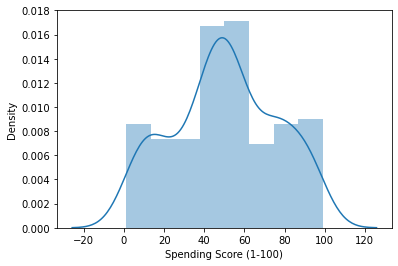

In [7]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

for x in columns:
    plt.figure()
    sns.distplot(df[x])

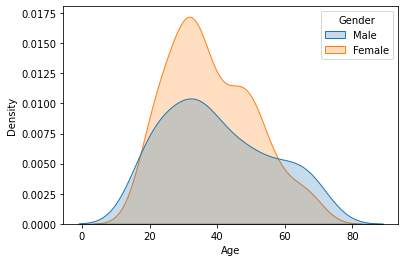

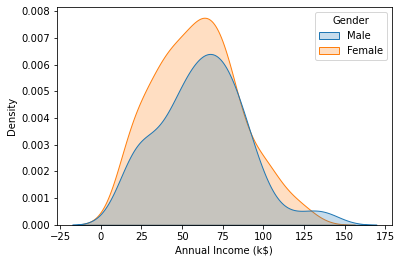

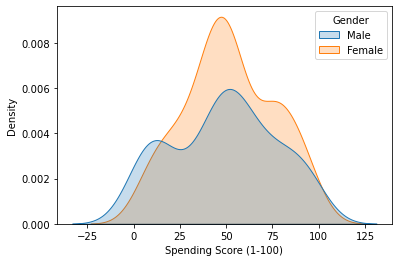

In [8]:
# separate each column by Gender using kdeplot

for x in columns:
    plt.figure()
    sns.kdeplot(df[x], shade = True, hue = df['Gender'])

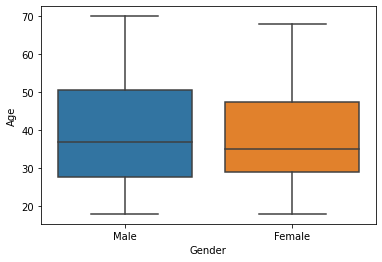

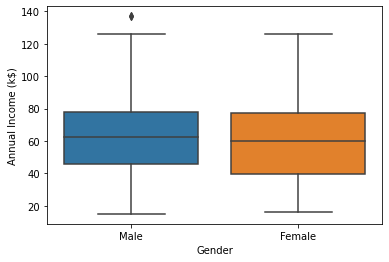

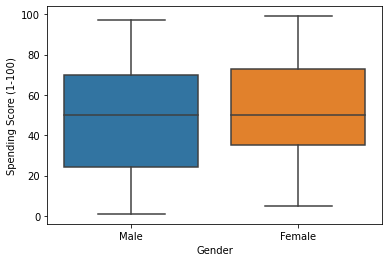

In [9]:
# visualizing using a boxplot
for x in columns:
    plt.figure()
    sns.boxplot(data = df, x = 'Gender', y = df[x])

In [10]:
df['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis
* 2 variables (usually a scatter plot - show the relationship between variables)

In [11]:
# drop customerID (because it does not add any value to our data)

df = df.drop('CustomerID', axis = 1)

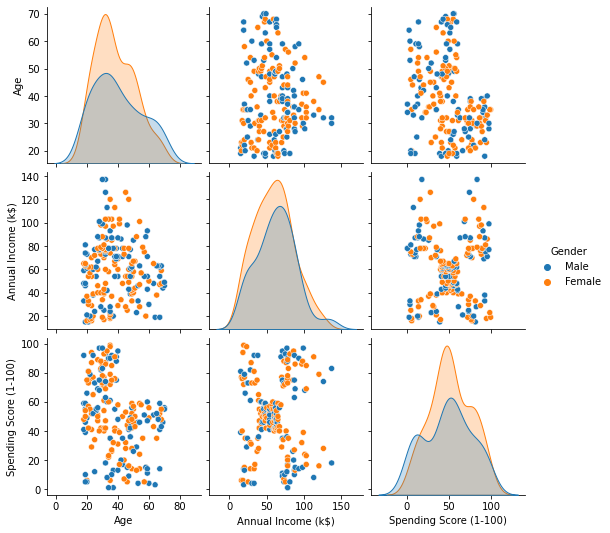

In [12]:
# pairplot (NB: not advisable as it provides too much and can be confusing)

sns.pairplot(df, hue = 'Gender')

In [13]:
# mean values based on Gender

df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<AxesSubplot:>

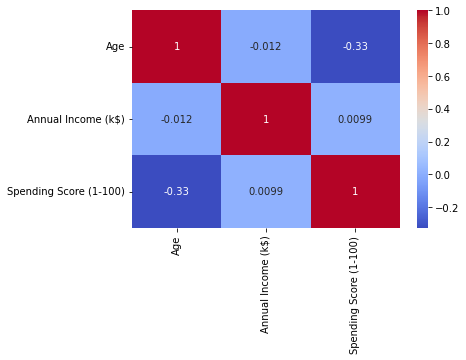

In [14]:
# correlation| heatmap
#print(df.corr())

sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

# Clustering - Univariate, Bivariate & Multivariate

In [15]:
# you can specify number of clusters to use (n_clusters = 6)
clustering1 = KMeans(n_clusters = 3)

In [16]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [17]:
# view all clustring labels
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [18]:
# compare to initial data
df['income cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [19]:
# How many customers fall in each income cluster
df['income cluster'].value_counts()

2    90
1    74
0    36
Name: income cluster, dtype: int64

In [20]:
# ideal number of clusters to use. (using the elbow method)
clustering1.inertia_

23517.33093093093

In [21]:
inertia_scores = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [22]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3931.9880952380945,
 2822.4996947496966,
 2173.2874458874467,
 1856.4664141414137]

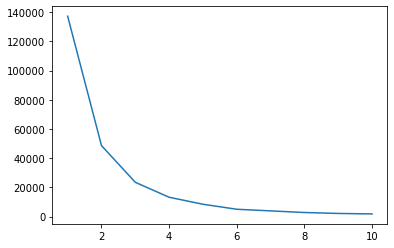

In [23]:
plt.plot(range(1,11), inertia_scores)

In [24]:
df.groupby('income cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


In [25]:
# Bivariate clustering

clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['spending & income cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending & income cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,0
2,Female,20,16,6,1,4
3,Female,23,16,77,1,0
4,Female,31,17,40,1,4


In [26]:
inertia_scores2 = []

for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

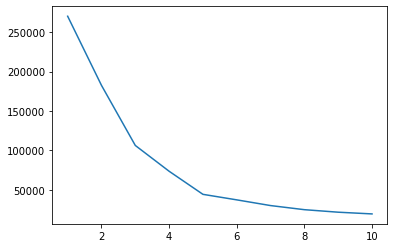

In [27]:
plt.plot(range(1,11), inertia_scores2)

In [28]:
df.groupby('spending & income cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
spending & income cluster,,,
0,25.272727,25.727273,79.363636
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,42.716049,55.296296,49.518519
4,45.217391,26.304348,20.913043


In [29]:
# get cluster centres
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']
centers

,x,y
0,25.727273,79.363636
1,88.200000,17.114286
2,86.538462,82.128205
3,55.296296,49.518519
4,26.304348,20.913043


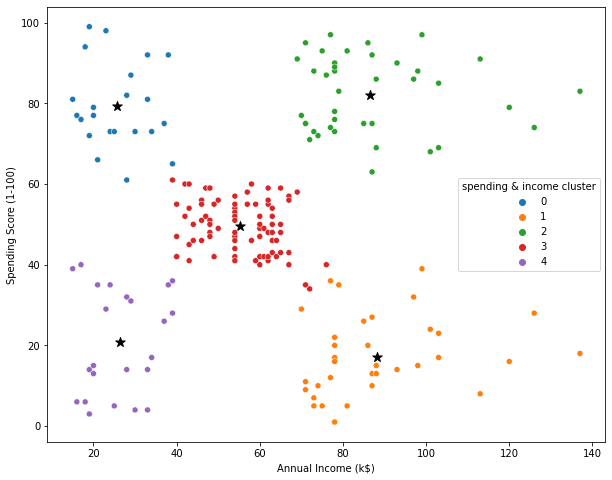

In [30]:
plt.figure(figsize = (10,8))
plt.scatter(x = centers['x'],y = centers['y'], s = 100, c = 'black', marker = '*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'spending & income cluster', palette = 'tab10')
plt.savefig('clustring_bivariate.png')

In [31]:
pd.crosstab(df['spending & income cluster'], df['Gender'], normalize = 'index')

Gender,Female,Male
spending & income cluster,,
0,0.590909,0.409091
1,0.457143,0.542857
2,0.538462,0.461538
3,0.592593,0.407407
4,0.608696,0.391304


In [32]:
#average age per cluster
df.groupby('spending & income cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
spending & income cluster,,,
0,25.272727,25.727273,79.363636
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,42.716049,55.296296,49.518519
4,45.217391,26.304348,20.913043


In [33]:
# Multivariate clustering
from sklearn.preprocessing import StandardScaler

In [34]:
scale = StandardScaler()

In [35]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending & income cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,0
2,Female,20,16,6,1,4
3,Female,23,16,77,1,0
4,Female,31,17,40,1,4


In [36]:
df = pd.get_dummies(df, drop_first = True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending & income cluster,Gender_Male
0,19,15,39,1,4,1
1,21,15,81,1,0,1
2,20,16,6,1,4,0
3,23,16,77,1,0,0
4,31,17,40,1,4,0


In [37]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'income cluster',
       'spending & income cluster', 'Gender_Male'],
      dtype='object')

In [38]:
df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [39]:
df = scale.fit_transform(df)
df

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [40]:
df = pd.DataFrame(scale.fit_transform(df))
df

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


In [41]:
inertia_scores3 = []

for i in range(1,11):
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(df)
    inertia_scores3.append(kmeans3.inertia_)

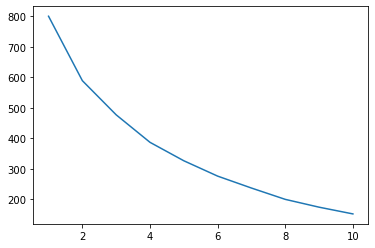

In [42]:
plt.plot(range(1,11), inertia_scores3)

In [43]:
df

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


In [44]:
df.to_csv('Clustering.csv')

# Analysis

Target cluster
* Target group would be cluster 1 which has a higher Spending score & high income
* 54% of cluster 1 shoppers are women. We should look for ways to attract these customers using a marketing campaign targeting popular items in this cluster
* Cluster 2 presents an interesting opportunity to market to the customers for sales event on popular items.